<a href="https://colab.research.google.com/github/saran459/OIBSIP-task-4-/blob/main/TASK_4_(customer_segmentation_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

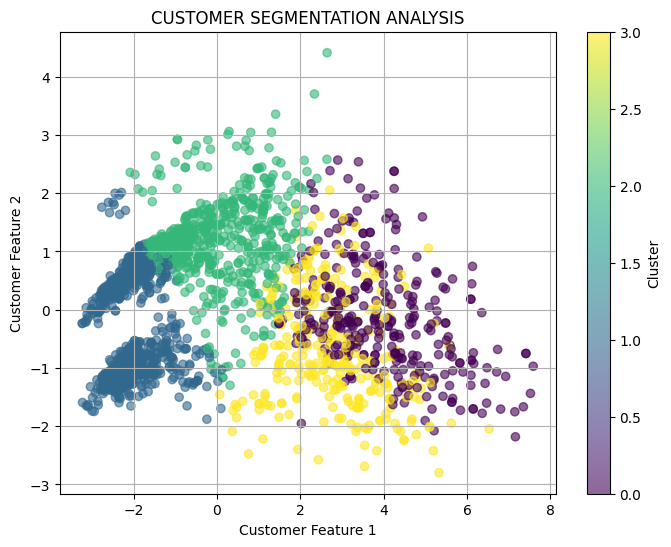

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('/content/customer segmentation analysis.csv')
df.head()
df.info()
df.isnull().sum()
# Step 1: Feature selection
features = df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
               'MntTotal', 'MntRegularProds']]
# Step 2: Handle missing values if any
features = features.dropna()
# Step 3: Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Step 4: Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
# Add cluster labels to the original DataFrame
df['Cluster'] = clusters
# Step 5: Visualize using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('CUSTOMER SEGMENTATION ANALYSIS')
plt.xlabel('Customer Feature 1')
plt.ylabel('Customer Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
